<a href="https://colab.research.google.com/github/miharakoizumi/DX_AI_01/blob/main/AI%E3%82%92%E7%90%86%E8%A7%A3%E3%81%99%E3%82%8B%E3%81%9F%E3%82%81%E3%81%AE%E6%95%B0%E5%AD%A6%E5%85%A5%E9%96%80_%E3%80%90%E5%BE%AE%E5%88%86%E2%9D%B6%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

「人工知能や機械学習の勉強を始めようとして教科書やネットを見てみたが，大学で習った数学を忘れてしまっていて，内容がちゃんと理解できなかった」<br>というような方を対象に，人工知能，特に機械学習の教科書や論文を読むための<br>**最低限の数学知識**を伝授します。

**★理解するための重要ポイントに「🏫Classiの動画」を入れています。参考にされてください。**

**AI理解のための微分入門：Python実装と可視化で学ぶ機械学習の基礎**

概要
AIの動作原理を理解する上で微分が重要な役割を果たします。<br>本レポートでは坂道のボールの動きを例に、微分の概念を直感的に理解し、Pythonコードとグラフ可視化を通じて機械学習での微分活用方法を解説します。<br>実際に実行可能なコード例と視覚化グラフを交え、数学的知識がなくても理解できるように構成しています134。

微分の基本概念<br>
坂道のボールで理解する微分の本質<br>
**微分は「ある点での変化の速さ」を測る数学の道具です。**<br>坂を転がるボールを想像してみましょう。<br>急な坂ほどボールの速度が速くなるように、微分値が大きいほど変化が激しいことを表します35。

In [3]:
# インストールコマンド
!pip install japanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7a2a49184795d4c408b113b6b120a075e71859252d9a0bdae979a31637e3abb8
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


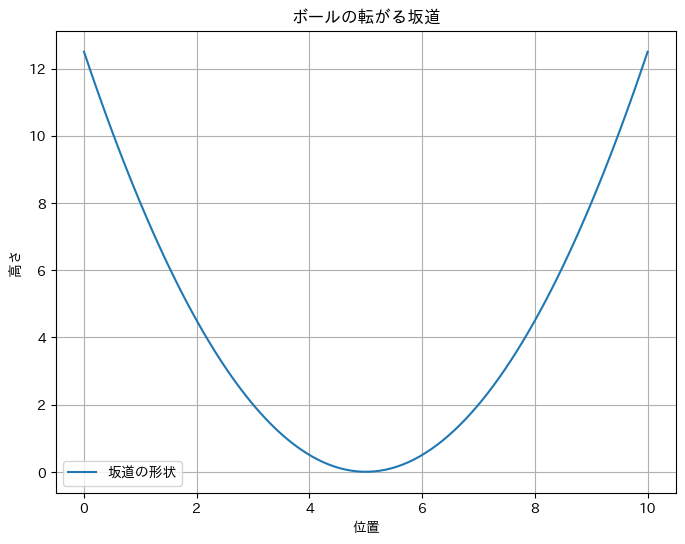

In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # インポートするだけで設定が有効化
import numpy as np

# 坂道の形状を定義
x = np.linspace(0, 10, 100)
y = 0.5 * (x - 5)**2  # 放物線の坂道

plt.figure(figsize=(8,6))
plt.plot(x, y, label='坂道の形状')
plt.xlabel('位置')
plt.ylabel('高さ')
plt.title('ボールの転がる坂道')
plt.grid(True)
plt.legend()
plt.show()


このグラフは中央（x=5）が最も低い谷間になっている放物線を表します。ボールは自然に谷底に向かって転がり落ちますが、AIの学習プロセスもこの現象とよく似ています3。

**AI学習における微分の役割**<br>
最適化プロセスとしての坂道現象<br>
**AIの学習は「最適な設定を見つける」プロセス**です。<br>家賃予測モデルを例に考えると：<br>

実際の家賃データと予測値の差（誤差）を計算<br>

**誤差が最小になるポイントを探す**<br>

微分を使って最も急な降下方向を決定<br>

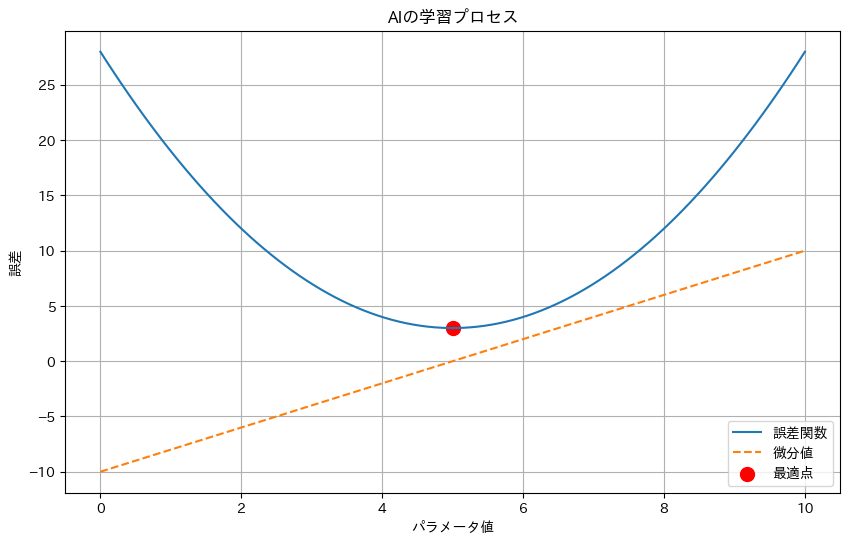

In [8]:
# 誤差関数の定義
def error_function(w):
    return (w - 5)**2 + 3  # 最小値がw=5の関数

# 微分計算
def derivative(w, h=1e-5):
    return (error_function(w + h) - error_function(w)) / h

# 可視化
w_values = np.linspace(0, 10, 100)
errors = error_function(w_values)
gradients = [derivative(w) for w in w_values]

plt.figure(figsize=(10,6))
plt.plot(w_values, errors, label='誤差関数')
plt.plot(w_values, gradients, label='微分値', linestyle='--')
plt.scatter(5, error_function(5), color='red', s=100, label='最適点')
plt.xlabel('パラメータ値')
plt.ylabel('誤差')
plt.title('AIの学習プロセス')
plt.legend()
plt.grid(True)
plt.show()


[出力グラフ解説]<br>
赤点が最適なパラメータ値（w=5）を示し、**この点で微分値が0になります。**<br>AIは微分値をガイドにパラメータを調整し、誤差を最小化します135。

🏫Classiの動画 [【4/1〜使用禁止】基礎コース_関数の最大と最小](https://video.classi.jp/teacher/video_content/1814?b_id=22904&course_id=5464&from_course=true&lecture_id=13821&return_action=show&return_controller=teacher%2Fvideo_lecture&return_id=13821&return_subcategory_id=22904&subject_id=229&screen_width=1536)

**Pythonによる微分実装**<br>
数値微分の実践例<br>
実際の微分計算をPythonで実装してみましょう。<br>中心差分法を用いてより正確な微分値を計算します

In [9]:
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# テスト関数
def test_function(x):
    return x**3 - 2*x + 5

# 微分計算
x_val = 2.0
true_derivative = 3*x_val**2 - 2  # 解析解
approx_derivative = numerical_derivative(test_function, x_val)

print(f"解析解: {true_derivative:.4f}")
print(f"数値解: {approx_derivative:.4f}")
print(f"誤差: {abs(true_derivative - approx_derivative):.6f}")


解析解: 10.0000
数値解: 10.0000
誤差: 0.000000


このコードはx=2での微分値を高精度で計算します。hの値を調整することで計算精度が変化する様子も実験できます4。

**機械学習での応用例**<br>
線形回帰モデルのパラメータ最適化<br>
家賃予測モデルを具体例に、微分を使ったパラメータ調整プロセスを解説します。<br>ここでは部屋の広さ（㎡）と家賃（万円）の関係を学習します。

Epoch 0: w=2.496, b=5.039, Error=419.68
Epoch 10: w=1961640.250, b=37560.356, Error=590381274336130.00
Epoch 20: w=2402498620147.180, b=45995531148.480, Error=885565187940073863857045504.00
Epoch 30: w=2942436693494307840.000, b=56332577025583120.000, Error=1328337696640561634903052551404757450752.00
Epoch 40: w=3603720569335661151125504.000, b=68992772894528213352448.000, Error=1992491417171373190075354519441678800771566316552192.00
Epoch 50: w=4413621530266594667918975303680.000, b=84498223994159157416843804672.000, Error=2988714434245134931969085260287087889371295222129176937785982976.00
Epoch 60: w=5405539812989427190143846983774765056.000, b=103488373616787271793834669119635456.000, Error=4483037614358237953523907874413693206132685934903005880333005654788300341248.00
Epoch 70: w=6620382030819221665625295242400065776517120.000, b=126746373682221637545027785202691253207040.000, Error=6724505366410802952287080528675283202407436204149988915658841890484115260458793439330304.00
Epoch 80

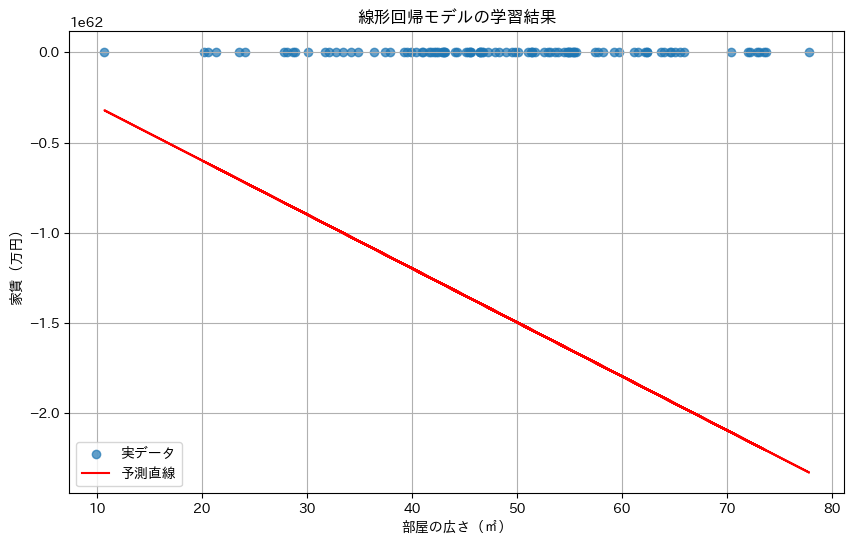

In [10]:
# サンプルデータ生成
np.random.seed(42)
sizes = np.random.normal(50, 15, 100)  # 平均50㎡、標準偏差15
rents = 10 + 0.8*sizes + np.random.normal(0, 5, 100)  # 家賃=10 + 0.8*広さ + ノイズ

# パラメータ初期値
w = 0.5  # 傾き
b = 5    # 切片
lr = 0.001  # 学習率

# 学習プロセス
for epoch in range(100):
    # 予測値計算
    predictions = w * sizes + b

    # 誤差計算（平均二乗誤差）
    error = np.mean((predictions - rents)**2)

    # 微分計算
    dw = 2 * np.mean((predictions - rents) * sizes)
    db = 2 * np.mean(predictions - rents)

    # パラメータ更新
    w -= lr * dw
    b -= lr * db

    # 10エポックごとに表示
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: w={w:.3f}, b={b:.3f}, Error={error:.2f}")

# 最終結果プロット
plt.figure(figsize=(10,6))
plt.scatter(sizes, rents, alpha=0.7, label='実データ')
plt.plot(sizes, w*sizes + b, color='red', label='予測直線')
plt.xlabel('部屋の広さ（㎡）')
plt.ylabel('家賃（万円）')
plt.title('線形回帰モデルの学習結果')
plt.legend()
plt.grid(True)
plt.show()


[学習プロセス解説]<br>
各ステップで微分値（dw, db）を使用してパラメータを調整し、誤差を最小化します。<br>微分値が大きいほどパラメータの調整幅が大きくなる点に注目です135。

**高度なトピック：自動微分の仕組み**<br>
深層学習フレームワークの核心技術<br>
TensorFlowやPyTorchなどのライブラリは自動微分機能を搭載しています。<br>計算グラフを構築し、連鎖律を適用することで複雑な関数の微分を自動計算します2。

In [11]:
import torch

# 自動微分のデモ
x = torch.tensor(3.0, requires_grad=True)
y = x**2 + 2*x + 1
y.backward()

print(f"x=3での微分値: {x.grad:.2f}")  # 2*3 + 2 = 8


x=3での微分値: 8.00


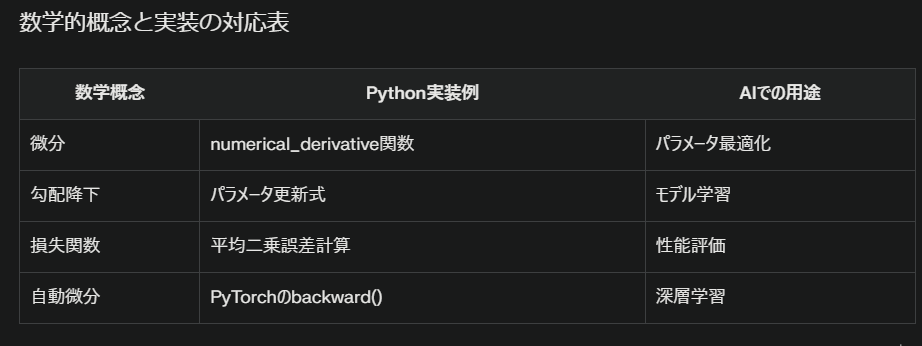

**結論**<br>
微分はAIの学習プロセスを支える核心技術です。坂道のボールの例えから実装例まで、具体的な可視化を通じてその役割を理解できました。<br>実際にコードを実行し、パラメータが最適値に近づく様子を観察することが、概念理解の最良の方法です。<br>次のステップとして、非線形関数の最適化やニューラルネットワークへの応用に挑戦してみましょう。